In [1]:
%autosave 10

Autosaving every 10 seconds


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as  pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [5]:
df=pd.read_csv("/content/drive/MyDrive/Internship/Internship/Project-Data-Set-Repository-master/Project-Data-Set-Repository-master/Data set/cleaned_data.csv")
X_train, X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,test_size=0.2, random_state=24)
y_train

array([1, 1, 0, ..., 1, 1, 0])

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)
model.fit(X_train,y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [9]:
y_pred=model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
prob_sum = np.sum(y_pred_proba,1)
pos_proba = y_pred_proba[:,1]


_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

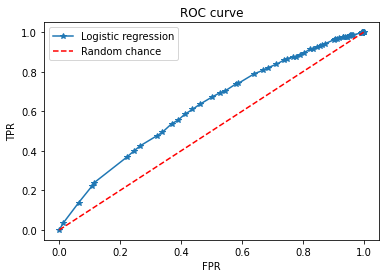

In [13]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [20]:
precision, recall, threshold  = metrics.precision_recall_curve(y_test, pos_proba)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precison-Recall curve')

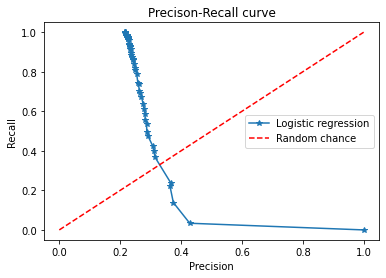

In [16]:
plt.plot(precision, recall, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precison-Recall curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [22]:
metrics. auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

Text(0.5, 1.0, 'ROC curve1')

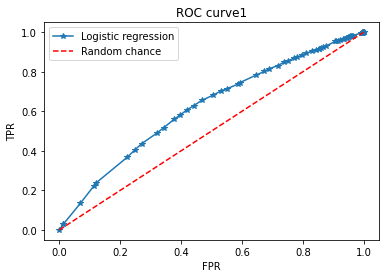

In [24]:
y_pred_proba1 = model.predict_proba(X_train)
prob_sum1 = np.sum(y_pred_proba1,1)
pos_proba1 = y_pred_proba1[:,1]

fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, pos_proba1)
plt.plot(fpr1, tpr1, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve1')

    How is this different, conceptually and quantitatively, from your earlier calculation?
